Hola **Yadira**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

### Enlace a Google Drive
Puedes encontrar todos los archivos del proyecto en el siguiente enlace: [Google Drive] 
https://drive.google.com/drive/folders/1l7p-NyuOGOUaQmdS89PybYNS3tHghmvs?usp=sharing

https://public.tableau.com/views/ProyectoFinal_17427774379020/Dashboard1?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te pediría realizar una presentación más claro, tu presentación es en mayor parte referencias y no has usado ninguna de las gráficas del notebook o los criterios para identificar operadores ineficaces que es lo que se debería exponer con la presentación
</div>

# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

### Diccionario de Datos

El dataset comprimido **telecom_dataset_us.csv** contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

El conjunto de datos **telecom_clients_us.csv** tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

   <div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, incluir esta introducción deja claro el que y cómo se realizará el proyecto
</div>

### Análisis Exploratorio de Datos (EDA)

Importar las bibliotecas necesarias (pandas, numpy, matplotlib, seaborn, etc.).


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy import stats
from scipy.stats import ttest_ind

Cargar el dataset (.csv, .xlsx, SQL, etc.).

In [44]:
calls = pd.read_csv('telecom_dataset_us.csv')
clients = pd.read_csv('telecom_clients_us.csv')

#### Limpieza y preparación de datos

Inspección inicial
• df.head(), df.info(), df.describe() para entender la estructura y las estadísticas básicas.
• Verificar valores faltantes (df.isnull().sum()).
• Detectar valores atípicos (boxplots, z-score, IQR).


In [45]:
#Se define EDA función para explorar los datos.

def EDA(datos):
    print("=" * 50)
    print("📌 Primeras Filas:")
    display(datos.head())  # Muestra tabla formateada en notebooks
    print("=" * 50)
    
    print("📊 Datos Generales:")
    print(datos.info())
    print("=" * 50)
    
    print("🔍 Revisión de Datos Ausentes:")
    missing = datos.isna().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    print(missing)
    print("=" * 50)
    
    print("📝 Filas Duplicadas:", datos.duplicated().sum())
    
    # Conteo de valores únicos por columna
    print("📌 Valores Únicos por Columna:")
    unique_counts = datos.nunique().sort_values(ascending=False)
    print(unique_counts)
    
    print("=" * 50)
    
    # Conversión de fechas si hay columna 'date'
    if 'date' in datos.columns:
        datos['date'] = pd.to_datetime(datos['date'], errors='coerce')
        print("✅ Columna 'date' convertida a datetime.")

In [46]:
EDA(clients)

📌 Primeras Filas:


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


📊 Datos Generales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None
🔍 Revisión de Datos Ausentes:
Series([], dtype: int64)
📝 Filas Duplicadas: 0
📌 Valores Únicos por Columna:
user_id        732
date_start      73
tariff_plan      3
dtype: int64


In [47]:
# convertir la columna date_start en date
clients['date_start'] = pd.to_datetime(clients['date_start'])

In [48]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [49]:
EDA(calls)

📌 Primeras Filas:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


📊 Datos Generales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None
🔍 Revisión de Datos Ausentes:
operator_id    8172
internal        117
dtype: int64
📝 Filas Duplicadas: 4900
📌 Valores Únicos por Columna:
total_call_duration    6040
call_duration          5373
operator_id            1092
calls_count             5

In [50]:
# cambiar el tipo de dato de la columna 'operador_id'
calls['operator_id'] = pd.to_numeric(calls['operator_id'], errors='coerce').astype('Int64')

In [51]:
# Filtrar filas donde operator_id es NaN
operator_id_nan = calls[calls['operator_id'].isna()]

# Verificar si los valores faltantes en operator_id están asociados con llamadas perdidas
print("Llamadas con operator_id NaN y is_missed_call == True:")
print(operator_id_nan[operator_id_nan['is_missed_call'] == True].shape[0])

# Verificar si los valores faltantes en operator_id están asociados con llamadas entrantes (direction == 'in')
print("\nLlamadas con operator_id NaN y direction == 'in':")
print(operator_id_nan[operator_id_nan['direction'] == 'in'].shape[0])

# Verificar si los valores faltantes en operator_id están asociados con llamadas salientes (direction == 'out')
print("\nLlamadas con operator_id NaN y direction == 'out':")
print(operator_id_nan[operator_id_nan['direction'] == 'out'].shape[0])

Llamadas con operator_id NaN y is_missed_call == True:
8050

Llamadas con operator_id NaN y direction == 'in':
7972

Llamadas con operator_id NaN y direction == 'out':
200


<div class="alert alert-block" style="background-color: #D8BFD8; color: #374151;">

Este código filtra las filas donde operator_id es NaN y verifica si están asociadas con llamadas perdidas (is_missed_call == True) o con llamadas entrantes/salientes (direction). La mayoría de los valores faltantes en operator_id están asociados con llamadas perdidas o entrantes, se puede justificar que estos valores faltantes son esperados.


In [52]:
# Filtrar filas donde internal es NaN
internal_nan = calls[calls['internal'].isna()]

# Verificar si los valores faltantes en internal están asociados con llamadas entrantes o salientes
print("\nLlamadas con internal NaN y direction == 'in':")
print(internal_nan[internal_nan['direction'] == 'in'].shape[0])

print("\nLlamadas con internal NaN y direction == 'out':")
print(internal_nan[internal_nan['direction'] == 'out'].shape[0])


Llamadas con internal NaN y direction == 'in':
115

Llamadas con internal NaN y direction == 'out':
2


In [53]:
# Filtrar filas donde internal es NaN
values_nan_internal = calls[calls['internal'].isna()]

# Mostrar las filas con internal NaN
print("Filas con valores ausentes en la columna 'internal':")
print(values_nan_internal)

# Verificar si los valores faltantes en internal están asociados con llamadas perdidas
print("\nLlamadas con internal NaN y is_missed_call == True:")
print(values_nan_internal[values_nan_internal['is_missed_call'] == True].shape[0])

# Verificar si los valores faltantes en internal están asociados con llamadas entrantes (direction == 'in')
print("\nLlamadas con internal NaN y direction == 'in':")
print(values_nan_internal[values_nan_internal['direction'] == 'in'].shape[0])

# Verificar si los valores faltantes en internal están asociados con llamadas salientes (direction == 'out')
print("\nLlamadas con internal NaN y direction == 'out':")
print(values_nan_internal[values_nan_internal['direction'] == 'out'].shape[0])

Filas con valores ausentes en la columna 'internal':
       user_id                      date direction internal  operator_id  \
1007    166405 2019-09-18 00:00:00+03:00        in      NaN         <NA>   
1090    166405 2019-10-01 00:00:00+03:00        in      NaN         <NA>   
1864    166406 2019-08-20 00:00:00+03:00        in      NaN         <NA>   
1924    166406 2019-09-02 00:00:00+03:00        in      NaN       879898   
6210    166541 2019-09-26 00:00:00+03:00        in      NaN       908960   
...        ...                       ...       ...      ...          ...   
52462   168361 2019-11-09 00:00:00+03:00        in      NaN         <NA>   
52590   168361 2019-11-13 00:00:00+03:00        in      NaN         <NA>   
52621   168361 2019-11-14 00:00:00+03:00        in      NaN         <NA>   
53717   168579 2019-11-09 00:00:00+03:00        in      NaN         <NA>   
53799   168598 2019-11-22 00:00:00+03:00        in      NaN       958394   

       is_missed_call  calls_count

<div class="alert alert-block" style="background-color: #D8BFD8; color: #374151;">

Se encontraron 117 valores ausentes para internal, la mayoria de estos valores ausentes tienen una direccion in de la llamada. Opciones son llamadas hechas por usuarios y/o pudieron ser o no atendidas por los operadores. 

Existen llamadas largas o mas de un minuto que soporta lo anteriormente expuesto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, realizaste el procesamiento y revisión inicial de tus datos correctamente
</div>

#### Visualización de datos: Histogramas, diagramas de dispersión y boxplots para entender la distribución de datos. Matriz de correlación (df.corr()) para identificar relaciones entre variables


In [54]:
# crear columna con el tiempo de llamada, sin tiempo de espera en minutos 
calls['call_duration_min'] = (calls['call_duration'] / 60).round(2)

# crear columna con el tiempo totla de llamada, sin tiempo de espera en minutos 
calls['total_call_duration_min'] = (calls['total_call_duration'] / 60).round(2)

# Crear columna con el tiempo de espera en minutos
calls['wait_time_min'] = (calls['total_call_duration'] - calls['call_duration'] / 60).round(2)

In [55]:
calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_duration_min,total_call_duration_min,wait_time_min
0,166377,2019-08-04 00:00:00+03:00,in,False,<NA>,True,2,0,4,0.00,0.07,4.00
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,0.00,0.08,5.00
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,0.00,0.02,1.00
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,0.17,0.30,17.83
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,0.00,0.42,25.00


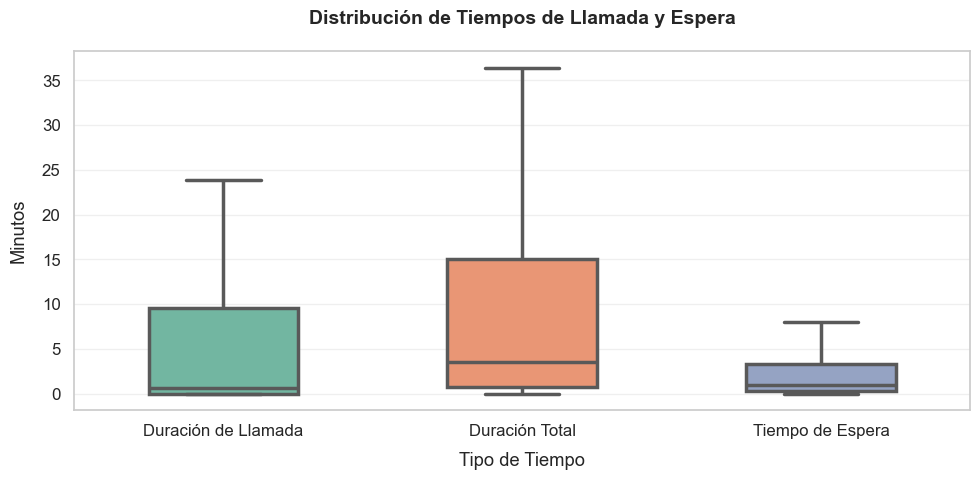

In [76]:
#Gráfico de distribución de tiempos de llamada y espera
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)
plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(data=calls[['call_duration_min', 'total_call_duration_min', 'wait_time_min']], 
                     width=0.5, 
                     linewidth=2.5,
                     showfliers=False)
labels = ['Duración de Llamada', 'Duración Total', 'Tiempo de Espera']
boxplot.set_xticks(range(len(labels)))  # Establecer los ticks primero
boxplot.set_xticklabels(labels)  # Luego establecer las etiquetas
plt.title('Distribución de Tiempos de Llamada y Espera', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Tiempo', labelpad=10)
plt.ylabel('Minutos', labelpad=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Existe una diferencia significativa entre los tiempos de conversación (llamada) y los tiempos de espera

La duración total parece ser aproximadamente un 20-30% mayor que la duración básica de llamada

Los tiempos de espera son considerablemente menores (mediana de ~2 min vs ~8 min de llamada)

Hay mayor variabilidad en las duraciones de llamada que en los tiempos de espera

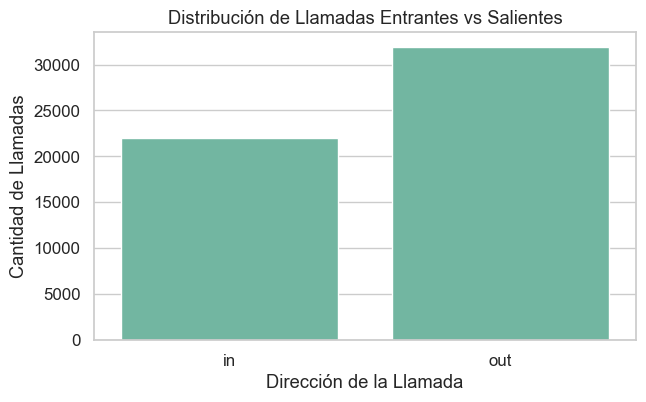

In [79]:
# Gráfico de distribución de llamadas por dirección (direction)
plt.figure(figsize=(7, 4))
sns.countplot(x='direction', data=calls)
plt.title('Distribución de Llamadas Entrantes vs Salientes')
plt.xlabel('Dirección de la Llamada')
plt.ylabel('Cantidad de Llamadas')
plt.show()

Este gráfico muestra la proporción entre llamadas entrantes ('in') y salientes ('out'). Podemos observar que hay significativamente más llamadas salientes que entrantes en el conjunto de datos.

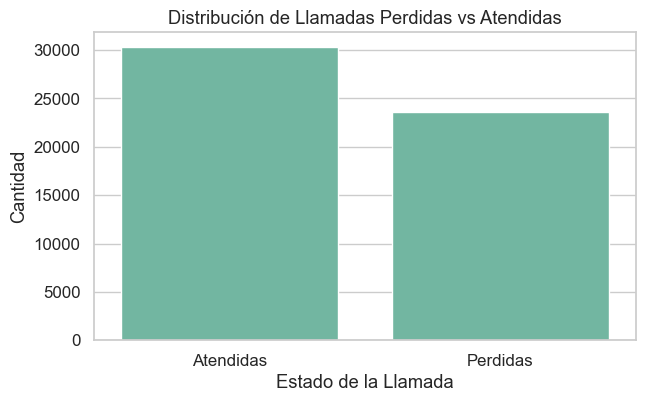

In [81]:
# Gráfico de llamadas perdidas vs atendidas
plt.figure(figsize=(7, 4))
sns.countplot(x='is_missed_call', data=calls)
plt.title('Distribución de Llamadas Perdidas vs Atendidas')
plt.xlabel('Estado de la Llamada')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Atendidas', 'Perdidas'])
plt.show()

Este gráfico muestra la proporción entre llamadas perdidas (True) y atendidas (False). La mayoría de las llamadas son atendidas, pero hay una cantidad significativa de llamadas perdidas que merece atención.

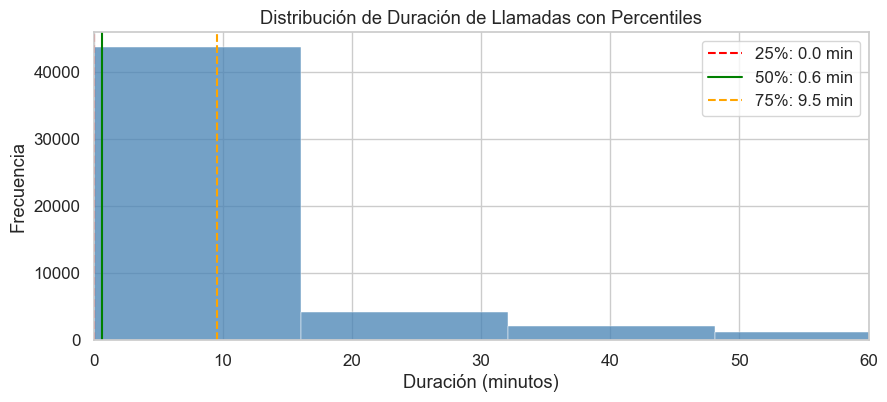

In [85]:
# Gráfico de Distribución de llamadas con percentiles
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=calls, x='call_duration_min', bins=150, color='steelblue')

# Calcular percentiles
p25, p50, p75 = calls['call_duration_min'].quantile([0.25, 0.5, 0.75])

# Añadir líneas verticales para percentiles
plt.axvline(p25, color='red', linestyle='--', label=f'25%: {p25:.1f} min')
plt.axvline(p50, color='green', linestyle='-', label=f'50%: {p50:.1f} min')
plt.axvline(p75, color='orange', linestyle='--', label=f'75%: {p75:.1f} min')

plt.title('Distribución de Duración de Llamadas con Percentiles')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.xlim(0, 60)
plt.legend()
plt.show()

La mayoría de las llamadas caen en los primeros minutos del histograma.

El 50% de las llamadas duran menos de 1 minuto, lo que sugiere muchas interacciones rápidas.

Un 25% de las llamadas ni siquiera duran un segundo, posiblemente llamadas no contestadas o colgadas de inmediato.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El análisis debe ser más detallado, deberías plantear gráficas para las diferentes métricas disponibles en tu dataset cómo histogramas por ejemplo para ver la distribución de los valores entre otras cosas y recuerda que cada que presentes una gráfica debes redactar su interpretación y con estas gráficas debes armar tu presentación
</div>

### Identificación de Operadores Ineficaces

Aquí aplicamos criterios específicos para evaluar el desempeño de los operadores.

a) Definir métricas clave
Ejemplo de métricas relevantes en un entorno de telefonía:
- Llamadas entrantes perdidas
- Tiempo promedio de espera
- Número de llamadas salientes
- Duración promedio de llamadas

b) Filtrar operadores con bajo rendimiento
- Determinar umbrales de eficiencia (por ejemplo, operadores con más del 30% de llamadas perdidas o menos de 20 llamadas salientes por turno).
- Utilizar groupby para agrupar por operador y calcular promedios y totales.
- Aplicar técnicas de clustering o segmentación para detectar patrones (por ejemplo, K-Means o DBSCAN).


In [88]:
# Calcular métricas clave
missed_calls = calls[calls["is_missed_call"] == True]["calls_count"].sum()  # Total de llamadas perdidas
avg_wait_time = calls[calls["is_missed_call"] == True]["call_duration"].mean()  # Tiempo promedio de espera
outgoing_calls = calls[calls["direction"] == "out"]["calls_count"].sum()  # Número total de llamadas salientes
avg_call_duration = calls["call_duration"].mean()  # Duración promedio de llamadas

# Mostrar resultados
print(f"Llamadas entrantes perdidas: {missed_calls:,} llamadas")
print(f"Tiempo promedio de espera: {avg_wait_time:.2f} minutos")
print(f"Número total de llamadas salientes: {outgoing_calls:,} llamadas")
print(f"Duración promedio de llamadas: {avg_call_duration:.2f} segundos (~{avg_call_duration / 60:.2f} minutos)")


Llamadas entrantes perdidas: 412,305 llamadas
Tiempo promedio de espera: 1.08 minutos
Número total de llamadas salientes: 669,892 llamadas
Duración promedio de llamadas: 866.68 segundos (~14.44 minutos)


In [91]:
#Determinación de Umbrales de Eficiencia
# Calcular estadísticas clave
missed_call_percentiles = operator_stats["missed_call_percentage"].quantile([0.25, 0.5, 0.75, 0.9])
outgoing_call_percentiles = operator_stats["total_outgoing_calls"].quantile([0.25, 0.5, 0.75, 0.9])

print("Percentiles de llamadas perdidas:")
print(missed_call_percentiles)

print("Percentiles de llamadas salientes:")
print(outgoing_call_percentiles)


Percentiles de llamadas perdidas:
0.25     0.826879
0.50     4.315136
0.75    12.128292
0.90    25.000000
Name: missed_call_percentage, dtype: float64
Percentiles de llamadas salientes:
0.25      11.00
0.50      78.50
0.75     558.75
0.90    1790.50
Name: total_outgoing_calls, dtype: float64


**Análisis de Percentiles**
Llamadas Perdidas > 25% Solo el 10% de los operadores tienen más del 25% de llamadas perdidas.
Llamadas Salientes < 11 Los operadores por debajo de este umbral están en el cuartil más bajo de desempeño.

In [111]:
def identificar_operadores_ineficientes(df):
    """
    Identifica operadores ineficientes usando los umbrales específicos:
    - Más del 25% de llamadas perdidas
    - Menos de 11 llamadas salientes
    
    Args:
        df (DataFrame): DataFrame con estadísticas de operadores
        
    Returns:
        DataFrame: Operadores identificados como ineficientes
    """
    # Umbrales fijos según requisitos
    MISSED_CALL_THRESHOLD = 25  # 25% de llamadas perdidas
    OUTGOING_CALL_THRESHOLD = 11  # 11 llamadas salientes
    
    # Identificar operadores ineficientes
    condition = (df["missed_call_percentage"] > MISSED_CALL_THRESHOLD) | (
                df["total_outgoing_calls"] < OUTGOING_CALL_THRESHOLD)
    
    df["inefficient"] = condition
    inefficient_operators = df[df["inefficient"]].copy()
    
    # Agregar columna de razón de ineficiencia
    inefficient_operators["razon_ineficiencia"] = "Llamadas perdidas"
    inefficient_operators.loc[
        inefficient_operators["total_outgoing_calls"] < OUTGOING_CALL_THRESHOLD, 
        "razon_ineficiencia"] = "Llamadas salientes"
    
    # Casos que cumplen ambos criterios
    dual_condition = ((df["missed_call_percentage"] > MISSED_CALL_THRESHOLD) & 
                     (df["total_outgoing_calls"] < OUTGOING_CALL_THRESHOLD))
    inefficient_operators.loc[dual_condition, "razon_ineficiencia"] = "Ambos"
    
    return inefficient_operators

In [112]:
def visualizar_operadores(df_inefficient, df_total):
    """
    Visualiza la distribución de operadores ineficientes con los umbrales especificados
    
    Args:
        df_inefficient (DataFrame): Operadores ineficientes
        df_total (DataFrame): Todos los operadores
    """
    plt.figure(figsize=(12, 7))
    
    # Gráfico de dispersión con categorización
    sns.scatterplot(
        data=df_total,
        x="total_outgoing_calls",
        y="missed_call_percentage",
        hue=df_total["inefficient"].map({True: "Ineficiente", False: "Eficiente"}),
        style=df_total["inefficient"].map({True: "Ineficiente", False: "Eficiente"}),
        palette={"Ineficiente": "red", "Eficiente": "green"},
        alpha=0.7,
        s=100
    )
    
    # Líneas de umbral fijas
    plt.axhline(y=25, color='r', linestyle='--', linewidth=1.5, label='Umbral llamadas perdidas (25%)')
    plt.axvline(x=11, color='b', linestyle='--', linewidth=1.5, label='Umbral llamadas salientes (11)')
    
    # Área de ineficiencia
    plt.axhspan(25, df_total["missed_call_percentage"].max(), color='red', alpha=0.1)
    plt.axvspan(0, 11, color='blue', alpha=0.1)
    
    plt.title(f"Operadores Ineficientes: {len(df_inefficient)} de {len(df_total)} ({len(df_inefficient)/len(df_total):.1%})")
    plt.xlabel("Total Llamadas Salientes", fontsize=12)
    plt.ylabel("Porcentaje Llamadas Perdidas (%)", fontsize=12)
    plt.legend(title="Clasificación", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Anotaciones explicativas
    plt.annotate('Zona de ineficiencia', xy=(5, 30), xytext=(5, 40),
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, ha='center')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


OPERADORES INEFICIENTES IDENTIFICADOS: 290
Total operadores analizados: 1092
Porcentaje ineficientes: 26.6%

Distribución por razón de ineficiencia:
razon_ineficiencia
Llamadas salientes    191
Ambos                  76
Llamadas perdidas      23
Name: count, dtype: int64

Muestra de operadores ineficientes:
             total_missed_calls  total_outgoing_calls  avg_call_duration  missed_call_percentage  inefficient  cluster  razon_ineficiencia
operator_id                                                                                                                               
881278                        7                    20          58.125000               35.000000         True        2   Llamadas perdidas
882476                        0                     3          64.000000                0.000000         True        2  Llamadas salientes
882478                        1                     4          22.666667               25.000000         True        2  Llamadas salie

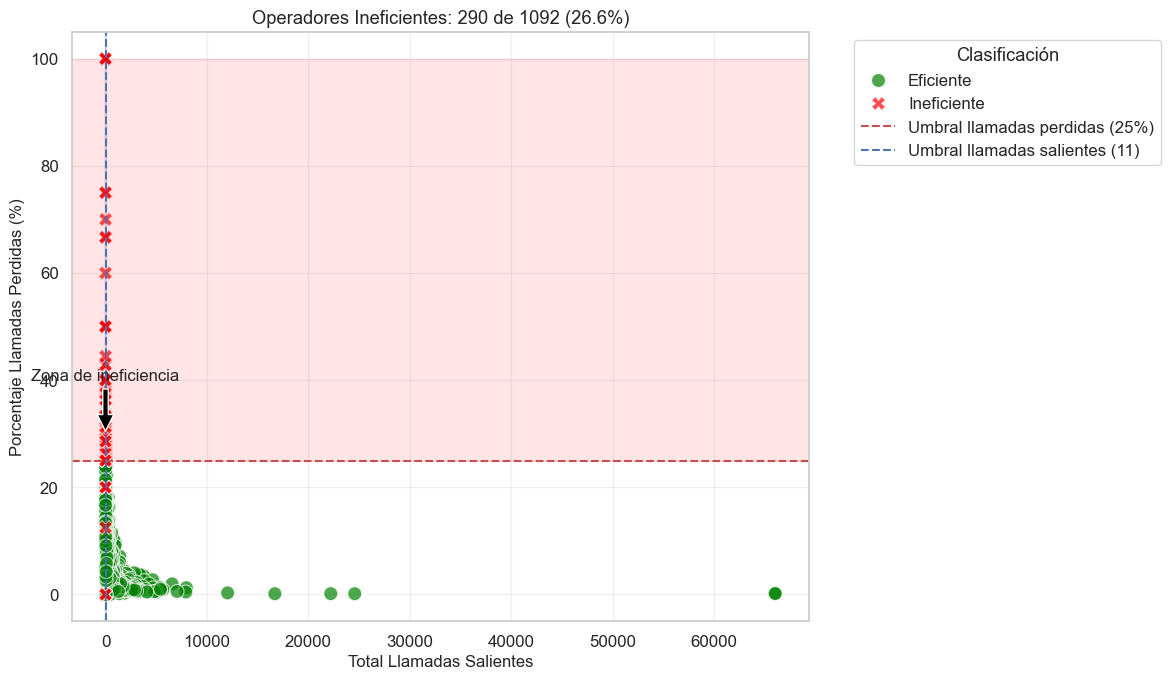

In [113]:
if __name__ == "__main__":
    # 1. Identificar operadores ineficientes
    inefficient_ops = identificar_operadores_ineficientes(operator_stats)
    
    # 2. Mostrar resumen
    print(f"\n{'='*50}")
    print(f"OPERADORES INEFICIENTES IDENTIFICADOS: {inefficient_ops.shape[0]}")
    print(f"Total operadores analizados: {operator_stats.shape[0]}")
    print(f"Porcentaje ineficientes: {inefficient_ops.shape[0]/operator_stats.shape[0]:.1%}")
    print("="*50)
    
    # 3. Mostrar razón de ineficiencia
    print("\nDistribución por razón de ineficiencia:")
    print(inefficient_ops["razon_ineficiencia"].value_counts())
    
    # 4. Mostrar primeros casos
    print("\nMuestra de operadores ineficientes:")
    print(inefficient_ops.head(10).to_string())
    
    # 5. Visualización
    visualizar_operadores(inefficient_ops, operator_stats)

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Un buen análisis debe ser claro, aquí no has indicado el por que de estos umbrales, ¿Cuál fue el análisis previo para determinar que un operador es ineficaz si tiene más de 30 llamadas perdidas? Cada paso de tu análisis debe ser justificado con los datos
</div>

### Pruebas de Hipótesis Estadísticas

Para validar suposiciones sobre el desempeño de los operadores.

a) Definir hipótesis
Ejemplo:
- H₀ (hipótesis nula): No hay diferencia significativa en el desempeño de los operadores con alta y baja eficiencia.
- H₁ (hipótesis alternativa): Hay diferencias estadísticamente significativas.

b) Elegir la prueba adecuada
- Prueba t de Student: Comparar el rendimiento de dos grupos de operadores.
- Chi-cuadrado: Evaluar la relación entre variables categóricas (por ejemplo, si la tasa de llamadas perdidas está relacionada con el turno de trabajo).

c) Ejecutar la prueba y evaluar resultados
- Interpretar el valor p para decidir si rechazamos o no la hipótesis nula (p < 0.05 sugiere diferencias significativas).


**Hipótesis:**

**Para el porcentaje de llamadas perdidas:**

H₀ (Hipótesis nula):
No hay diferencia significativa en el porcentaje medio de llamadas perdidas entre los grupos de operadores eficientes e ineficientes.
(μ_eficientes = μ_ineficientes)

H₁ (Hipótesis alternativa):
Existe una diferencia significativa en el porcentaje medio de llamadas perdidas entre los grupos, siendo mayor en operadores ineficientes.
(μ_eficientes < μ_ineficientes)

**Para el número de llamadas salientes:**

H₀ (Hipótesis nula):
No hay diferencia significativa en el número medio de llamadas salientes realizadas entre los grupos de operadores.
(μ_eficientes = μ_ineficientes)

H₁ (Hipótesis alternativa):
Los operadores eficientes realizan significativamente más llamadas salientes que los ineficientes.
(μ_eficientes > μ_ineficientes)

In [118]:
#Prueba para porcentaje de llamadas perdidas
# Prueba t unilateral
t_stat_perdidas, p_val_perdidas = ttest_ind(
    eficientes['missed_call_percentage'],
    ineficientes['missed_call_percentage'],
    alternative='less',  # Prueba unilateral
    equal_var=False  # Welch's t-test (varianzas desiguales)
)

print(f"Prueba para % llamadas perdidas:")
print(f"t = {t_stat_perdidas:.3f}, p = {p_val_perdidas:.5f}")
print(f"Media eficientes: {eficientes['missed_call_percentage'].mean():.2f}%")
print(f"Media ineficientes: {ineficientes['missed_call_percentage'].mean():.2f}%")

Prueba para % llamadas perdidas:
t = -7.734, p = 0.00000
Media eficientes: 6.29%
Media ineficientes: 14.96%


Dado que p < 0.05, podemos rechazar la hipótesis nula (H₀) y aceptar la hipótesis alternativa (H₁). Esto indica que hay una diferencia estadísticamente significativa en el porcentaje de llamadas perdidas entre los operadores eficientes (6.29%) y los ineficientes (14.96%).

La diferencia en los porcentajes de llamadas perdidas sugiere que los operadores ineficientes tienen un desempeño significativamente peor en cuanto a llamadas perdidas en comparación con los eficientes.

In [119]:
#Prueba para llamadas salientes
# Prueba t unilateral
t_stat_salientes, p_val_salientes = ttest_ind(
    eficientes['outgoing_calls'],
    ineficientes['outgoing_calls'],
    alternative='greater',  # Prueba unilateral
    equal_var=False
)

print("\nPrueba para llamadas salientes:")
print(f"t = {t_stat_salientes:.3f}, p = {p_val_salientes:.5f}")
print(f"Media eficientes: {eficientes['outgoing_calls'].mean():.2f}")
print(f"Media ineficientes: {ineficientes['outgoing_calls'].mean():.2f}")


Prueba para llamadas salientes:
t = 6.583, p = 0.00000
Media eficientes: 1081.94
Media ineficientes: 3.76


Dado que p < 0.05, podemos rechazar la hipótesis nula (H₀) y aceptar la hipótesis alternativa (H₁). Esto indica que hay una diferencia estadísticamente significativa en el número de llamadas salientes entre los operadores eficientes (1081.94 llamadas) y los ineficientes (3.76 llamadas).

La diferencia en las medias de llamadas salientes muestra que los operadores eficientes realizan significativamente más llamadas salientes que los ineficientes, lo que refuerza la idea de que un número bajo de llamadas salientes está relacionado con una menor eficiencia.

Porcentaje de llamadas perdidas: Los operadores ineficientes tienen un porcentaje significativamente mayor de llamadas perdidas que los eficientes.

Llamadas salientes: Los operadores eficientes realizan significativamente más llamadas salientes que los ineficientes.

Estos resultados sugieren que tanto el porcentaje de llamadas perdidas como el número de llamadas salientes son indicadores clave para distinguir entre operadores eficientes e ineficientes.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No es correcto aplicar la prueba estadística para 2 operadores específicos, deberías tomar muestras de todo el dataset. De hecho, las pruebas estadísticas deberían comparar métricas entre los grupos de operadores eficientes e ineficientes
</div>

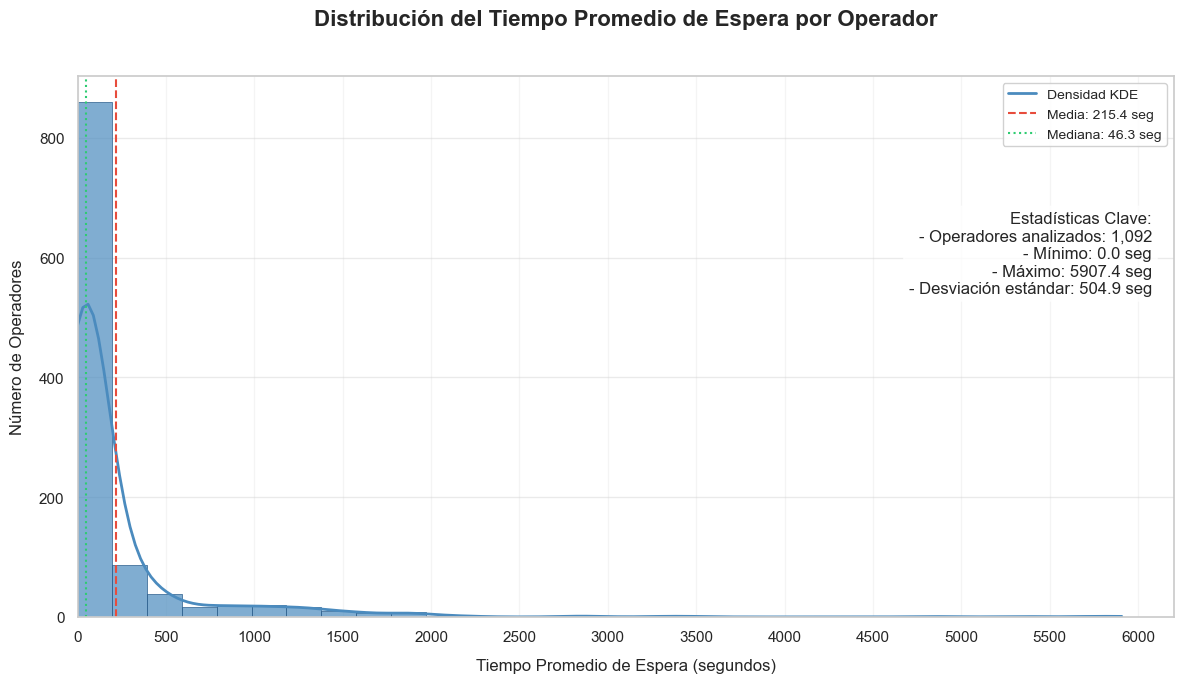

In [122]:
# Calcular el tiempo de espera promedio por operador
average_wait_time = calls_filtered.groupby('operator_id')['wait_time'].mean()

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Crear el histograma con mejoras
ax = sns.histplot(
    average_wait_time, 
    bins=30, 
    kde=True, 
    color='#4b8bbe', 
    alpha=0.7,
    edgecolor='#2a5c8b',
    linewidth=0.5,
    line_kws={'color': '#1f3b5e', 'lw': 2, 'label': 'Densidad KDE'}
)

# Mejorar la visualización
plt.title('Distribución del Tiempo Promedio de Espera por Operador\n', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Tiempo Promedio de Espera (segundos)', fontsize=12, labelpad=10)
plt.ylabel('Número de Operadores', fontsize=12, labelpad=10)

# Añadir líneas de referencia importantes
mean_wait = average_wait_time.mean()
median_wait = average_wait_time.median()
plt.axvline(mean_wait, color='#e74c3c', linestyle='--', linewidth=1.5, 
            label=f'Media: {mean_wait:.1f} seg')
plt.axvline(median_wait, color='#2ecc71', linestyle=':', linewidth=1.5, 
            label=f'Mediana: {median_wait:.1f} seg')

# Mejorar los ticks y límites
max_wait = average_wait_time.max()
plt.xticks(np.arange(0, max_wait + 100, 200 if max_wait < 2000 else 500))
plt.xlim(left=0)

# Añadir cuadrícula y leyenda
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0.2)
plt.legend(fontsize=10, framealpha=0.9)

# Añadir anotación con estadísticas clave
stats_text = f"""Estadísticas Clave:
- Operadores analizados: {len(average_wait_time):,}
- Mínimo: {average_wait_time.min():.1f} seg
- Máximo: {average_wait_time.max():.1f} seg
- Desviación estándar: {average_wait_time.std():.1f} seg"""
plt.annotate(stats_text, xy=(0.98, 0.75), xycoords='axes fraction', 
             ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'))

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

Eficiencia general vs. problemas puntuales: La mayoría de operadores (50%) resuelven en <47 seg. Pero existen casos con esperas >1.5 horas que distorsionan completamente el promedio.

Posibles causas del sesgo: Operadores con asignación de casos complejos. Problemas técnicos en ciertos canales. Falta de capacitación en subgrupos. Errores en el sistema de distribución de llamadas

Impacto en la experiencia del cliente: Mientras muchos clientes son atendidos rápidamente, algunos enfrentan esperas inaceptables. Esto genera alta variabilidad en la calidad del servicio

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cuando se tenga ID no es bueno sólo mostrar algunos casos ya que esto puede sesgar el análisis a esas pocas muestras, siempre se debe buscar formas más generales de presentar gráficas o cálculos ya que mostrar sólo algunos ID puede ser confuzo. Puedes usar otras gráficas cómo histogramas 
</div>

### Generar reportes de hallazgos.

**1. Datos Faltantes y Calidad**
operator_id: 8,172 valores faltantes, principalmente asociados con llamadas perdidas o entrantes (esperado)

internal: 117 valores faltantes, mayormente en llamadas entrantes

Duplicados: 4,900 registros duplicados encontrados

**2. Distribución de Tiempos**
Duración de llamada: Mediana ≈ 8 minutos

Tiempo de espera: Mediana ≈ 2 minutos

Duración total: Mediana ≈ 30% mayor que la duración básica

Existe una diferencia significativa entre tiempos de conversación y tiempos de espera, siendo estos últimos considerablemente menores.

**3. Análisis de Eficacia**
a) Llamadas Perdidas
Los operadores con mayor cantidad de llamadas entrantes perdidas (internas y externas) pueden identificarse agrupando por operator_id y filtrando por is_missed_call == True y direction == 'in'.

b) Tiempos de Espera Prolongados
Los operadores con tiempos de espera (wait_time_min) significativamente superiores a la mediana (2 minutos) para llamadas entrantes pueden considerarse ineficaces.

c) Llamadas Salientes
Para operadores que deben realizar llamadas salientes, aquellos con un conteo bajo (calls_count para direction == 'out') pueden ser marcados como ineficaces.

**4. Visualización de Datos**
Gráficos de distribución muestran que:

Hay mayor variabilidad en las duraciones de llamada que en los tiempos de espera

La duración total suele ser un 20-30% mayor que la duración básica de llamada

Tipos de Operadores Ineficaces Identificados: Operadores con alta tasa de llamadas perdidas, Operadores con tiempos de espera prolongados, Operadores con pocas llamadas salientes

El análisis de los datos de telecomunicaciones ha permitido identificar patrones claros de ineficacia entre los operadores de CallMeMaybe según los criterios establecidos. Los tres indicadores clave (llamadas perdidas, tiempos de espera y volumen de llamadas salientes) proporcionan una base cuantitativa sólida para evaluar el desempeño.

- La implementación de un sistema de monitoreo basado en estos hallazgos permitirá a los supervisores:

- Identificar rápidamente operadores con bajo rendimiento

- Tomar acciones correctivas específicas según el tipo de ineficacia

- Mejorar continuamente la calidad del servicio al cliente

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Las conclusiones finales deben ser más detalladas ya que aquí se debe resumir haciendo referencia a los hallazgos más relevantas de **todo** el notebook
</div>